In [1]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading and reading the data and saving as a variable
file_path = ('/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/Zeta-Potential_Plots/20231204_Zeta_DIP_Serum10.xlsx')
sheet_name = "Sheet1"  

# reading and saving data from specific excel sheet
df = pd.read_excel(file_path, sheet_name="Sheet1")

In [4]:
# saving variables for plotting
polymer = df["Polymer"]
zeta = df['Zeta Potential']
stdev = df['Stdev']

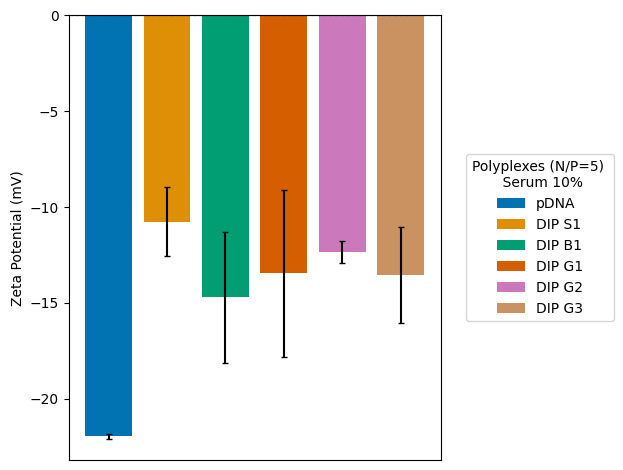

In [5]:
# generating colorblind-friendly colors
num_polymer = polymer.nunique()
colors = sns.color_palette("colorblind", num_polymer)

# mapping each polymer to a color
polymer_to_color = dict(zip(polymer.unique(), colors))

# plotting bars individually to set color and label for each polymer
for p in polymer.unique():
    plt.bar(p, zeta[polymer == p].values[0], 
            yerr=stdev[polymer == p].values[0], 
            capsize=2, 
            color=polymer_to_color[p], 
            label=p)

# plotting
plt.ylabel('Zeta Potential (mV)')
plt.xticks([])
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', title='Polyplexes (N/P=5) \n       Serum 10%')
plt.tight_layout()
plt.show()
